# **Identifying handwritten numbers**

Here we will use two types of artificial learning network. Before using a deep
convolutional network, we will test a multilayer perceptron

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

*Loading Dataset*

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print("x_train shape:", x_train.shape)  # Should be (60000, 28, 28)
print("y_train shape:", y_train.shape)  # Should be (60000,)
print("x_test shape:", x_test.shape)    # Should be (10000, 28, 28)
print("y_test shape:", y_test.shape)    # Should be (10000,)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


*Data Preparation*
Flattening our inputs to pass it to into into our fully connected hidden layer of our MLP

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


*Rescaling*

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test =  keras.utils.to_categorical(y_test, 10)
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Passing input units (784) into fully connected hidden layer (256)

This layer feeds into the output/label layer.
Label layer activation function is followed by an activation function.
The activation function follows a softmax function: this gives the probability that each image is a digit.

In [ ]:
from tensorflow.python.ops.gen_nn_ops import Softmax
model = keras.Sequential() #Initialisation
model.add(keras.layers.Dense(256, input_shape=(784, ))) #Defining Fully connected layers
model.add(keras.layers.Dense(10, activation='softmax')) #Defining
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We want to compile the model with
*   Suitable loss function
*   optimisation procedures
*   performance measures


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

**Training and evaluation**

Now we will fit the model to our training set, keeping a history of the performance at
each stage. We will use 12 training epochs. We will set aside a random 20% of our
data to check performance at each training epoch (which don’t change between
epochs). In each training epoch, we will use 128 image-label pairs per batch to
improve computational efficiency. We will use the verbose argument to tell us what
is happening in each epoch

In [ ]:
history = model.fit(x_train, y_train, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 10s 25ms/step - loss: 0.4044 - accuracy: 0.8841 - val_loss: 0.2852 - val_accuracy: 0.9207
Epoch 2/12
375/375 [==============================] - 6s 16ms/step - loss: 0.3080 - accuracy: 0.9122 - val_loss: 0.2991 - val_accuracy: 0.9175
Epoch 3/12
375/375 [==============================] - 7s 18ms/step - loss: 0.2972 - accuracy: 0.9164 - val_loss: 0.2819 - val_accuracy: 0.9197
Epoch 4/12
375/375 [==============================] - 10s 27ms/step - loss: 0.2884 - accuracy: 0.9184 - val_loss: 0.2775 - val_accuracy: 0.9262
Epoch 5/12
375/375 [==============================] - 9s 25ms/step - loss: 0.2823 - accuracy: 0.9202 - val_loss: 0.2838 - val_accuracy: 0.9223
Epoch 6/12
375/375 [==============================] - 9s 24ms/step - loss: 0.2778 - accuracy: 0.9218 - val_loss: 0.2816 - val_accuracy: 0.9242
Epoch 7/12
375/375 [==============================] - 10s 27ms/step - loss: 0.2750 - accuracy: 0.9222 - val_loss: 0.2750 - val_accuracy: 0.9

Plotting Training-set and Validation-set loss and accuracy

Text(0.5, 1.0, 'Accuracy Curves')

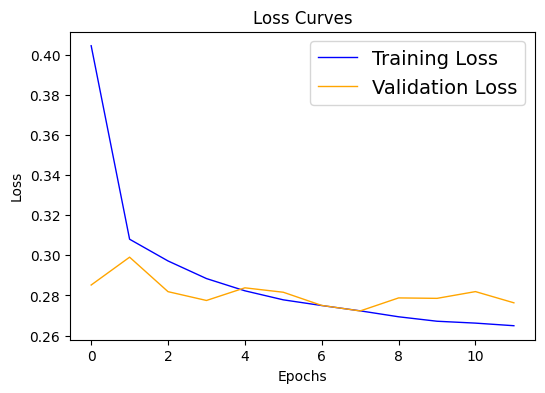

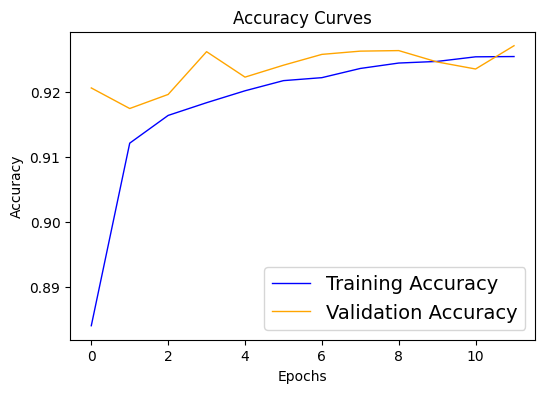

In [ ]:
# Plotting the loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'blue', linewidth=1.0)
plt.plot(history.history['val_loss'], 'orange', linewidth=1.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Plotting the accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'blue', linewidth=1.0)
plt.plot(history.history['val_accuracy'], 'orange', linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

The information provided by loss and accuracy are important to

*   detect performance changes
*   diagnose underfitting/overfitting
*   select the epochs for using trained model weights at the inferencing stage






In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(accuracy)
print(loss)

0.9254000186920166
0.28156372904777527


The graph on the left shows the training loss and the validation loss through the different epochs, while the
graph on the right shows the training accuracy and the validation accuracy through the different epochs. The
training data is visible as blue, while the validation data is orange. The graphs start with the loss and accuracy
values after the first epoch.
The accuracy curve for the training shows that our model is learning quickly between the first two epochs; later
the learning improvement starts to gradually slow down from epoch 2 with a sudden slight decrease in epoch
10.
On the other hand, the validation accuracy curve shows that our network is not constant in learning on a new
dataset of images due to the important fluctuation in the validation accuracy curve. The network is performing
poorly on epochs 2, 4, 5, and 9 due to the decrease in the curve. Although the curve is not that smooth, the
descents are gradually flattening after each epoch. This means that overall our network learned from the
dataset with still some room for improvement.
By comparing the two accuracy curves, we can see how the network has a lower accuracy on the training set
in the first few epochs (epochs 1-4) with better performance on the validation set, resulting in the training loss
curve being above the validation loss curve.
In the loss graph, the trend reverses with the training loss higher than the test loss in the first few epochs
(around epoch 3).
By comparing the two loss curves with the two accuracy curves, we can almost look at the loss graph as a
horizontal reflection of the validation graph, with the highs and lows of the accuracy curves matching the lows
and highs of the loss curves.
In the first few epochs (1-3) the training error is lower than the validation error with an intersection around
epoch 3. In the following epochs, the validation loss curve remains above the training loss curve and they
finally end up decreasing their value while still maintaining a small gap between them.
It’s interesting to notice how there is a gap in the final part of the two curves, resulting in a high testing loss,
which indicates that our model could generalise well and is said to be overfitting the data.


## Q4. Changing model parameters
In the previous model, we did not specify an activation function for our hidden layer,
so it used the default linear activation. Now we will make a similar model with a rectified activation in the first hidden layer

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/12
375/375 [==============================] - 10s 20ms/step - loss: 0.3278 - accuracy: 0.9086 - val_loss: 0.1841 - val_accuracy: 0.9467
Epoch 2/12
375/375 [==============================] - 7s 18ms/step - loss: 0.1476 - accuracy: 0.9574 - val_loss: 0.1260 - val_accuracy: 0.9643
Epoch 3/12
375/375 [==============================] - 9s 23ms/step - loss: 0.1007 - accuracy: 0.9713 - val_loss: 0.1055 - v

Text(0.5, 1.0, 'Accuracy Curves')

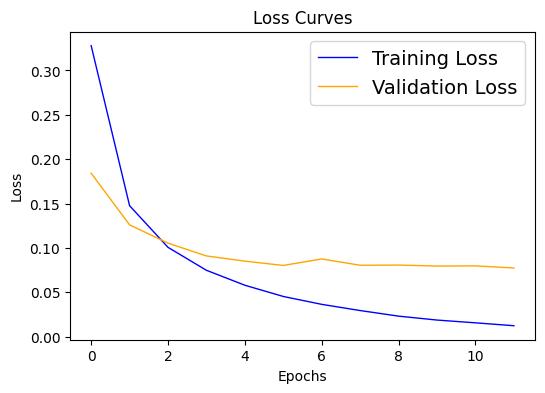

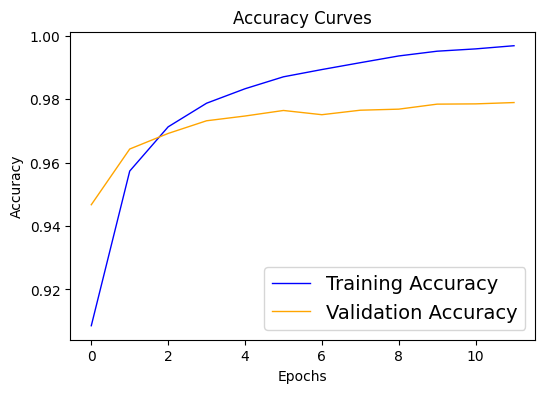

In [ ]:
model = keras.Sequential() #Initialisation
model.add(keras.layers.Dense(256, input_shape=(784, ), activation='relu')) #Defining Fully connected layers
model.add(keras.layers.Dense(10, activation='softmax')) #Defining
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics='accuracy')
history = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

# Plotting the loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'blue', linewidth=1.0)
plt.plot(history.history['val_loss'], 'orange', linewidth=1.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Plotting the accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'blue', linewidth=1.0)
plt.plot(history.history['val_accuracy'], 'orange', linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(accuracy)
print(loss)

0.9801999926567078
0.06863638013601303


Both training and validation stages are affected by the introduction of the Rectified Linear Unit, which
accelerates the convergence of all the curves. The loss functions are smoother and all the fluctuations
disappear for both accuracy and loss for both the training set and validation set. Now the model has an
increased capacity to learn complex and non-linear patterns in the data. A downside to that is the higher risk of
overfitting the training data, especially as it happens with noisy data, which in our case amplifies the already
existing overfitting.
Looking at the accuracy, the introduction of the ReLU activation improved the performance of this model by
around 5% even since the first few epochs: the validation accuracy without ReLUin the first epoch was 88%
and in the second 91%, while with the introduction of the activation function went from 91% to 96%, improving
both the starting accuracy by 3% and the first learning difference by 2%. The training accuracy of this model
started at 91%, compared to the previous 89%, and reached almost 99% in the last epoch, revealing how it
specialises in the training data and probably causing overfitting. Even though the final validation accuracy of
this new model reaches almost 98%, while the previous one reached 92%, it’s still clear that the model could
have been generalised better if it wasn’t for the overfitting.
Simultaneously the training loss still behaves as a horizontal reflection of the accuracy resulting in a
substantial drop of around 20%. Compared to the training loss of the previous model, which reduced the error
by 9% resulting from the 40% to 31% drop, the current model almost doubled the error reduction by achieving
15% in the 30% to 15% gap. The validation loss of the previous model, which was around 5% and resulted
from the 33% to 28% gap, increased in the current model reaching 8% which results from the 18% to 10%
drop. The gap between the two loss functions is enhanced and now is even bigger than before, and therefore
we can conclude that the model suffers more from overfitting, proving that the model's generalisation
capabilities were notably degraded with the Relu.

## Q6. Deep Convolutional Neural Networks
First, we need to prepare our data differently. Convolutional layers don’t flatten x and
y spatial dimensions, and need an extra dimension for colour channels (in the input
image) or multiple feature maps (from previous convolution steps).

In [ ]:
#DATA PREPARATION

#No need to flatten x and y spatial dimensions with CNNs
#Adding extra dimension (1)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

#Rescaling between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

#Categorical units as before
y_train = keras.utils.to_categorical(y_train, 10)
y_test =  keras.utils.to_categorical(y_test, 10)

print("x_train shape:", x_train.shape)  # Should be (60000, 28, 28)
print("y_train shape:", y_train.shape)  # Should be (60000,)
print("x_test shape:", x_test.shape)    # Should be (10000, 28, 28)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


Now we will define a convolutional learning model with 2 convolutional layers that
result from 32 convolutional filters into the first layer and 64 filters into the second.
We will use 3x3 pixel filters to sample from the image to the first layer, and the same
to sample from the first layer to the second. We will use rectified activation functions
for both convolutional layers. We will use pooling to downsample the second
convolutional layer to half its size in both spatial dimensions (so one quarter of the
pixels). We will flatten the resulting feature map to one dimension, then use one fullyconnected layer to link our network to the labels.

In [ ]:
#CNN
#2 Convolutional layer: 32 filters first layer, 64 filters 2nd layer.
#Sampling from source Image to 1st layer and 1sy layer to 2nd made with filters 3x3 pixels each.
#Rectified Activation Function for each Convolutional layer
#Downsamplind 2nd Conv. layer with Pooling. Size reduced to 1/2 for both dimension, hence 1/4 of pixel. This produce a feature map
#Resulting Feature map flattened to 1D
#Linking network to labels with 1-fully-connected-layer

model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')
history = model.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 223s 587ms/step - loss: 0.2246 - accuracy: 0.9303 - val_loss: 0.0717 - val_accuracy: 0.9795
Epoch 2/6
375/375 [==============================] - 257s 687ms/step - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.0465 - val_accuracy: 0.9857
Epoch 3/6
375/375 [==============================] - 228s 608ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0462 - val_accuracy: 0.9863
Epoch 4/6
375/375 [==============================] - 261s 695ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0461 - val_accuracy: 0.9860
Epoch 5/6
375/375 [==============================] - 244s 651ms/step - loss: 0.0154 - accuracy: 0.9955 - val_loss: 0.0439 - val_accuracy: 0.9880
Epoch 6/6
375/375 [==============================] - 234s 623ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.0476 - val_accuracy: 0.9881


Text(0.5, 1.0, 'Accuracy Curves')

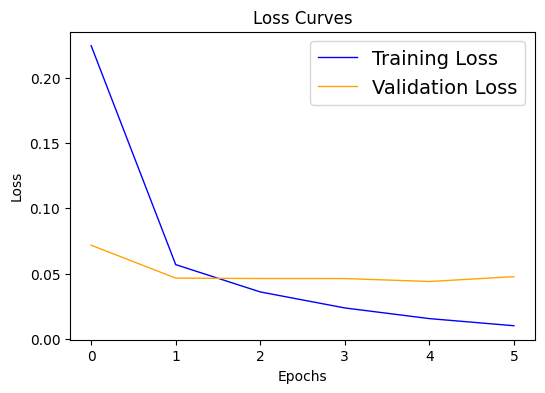

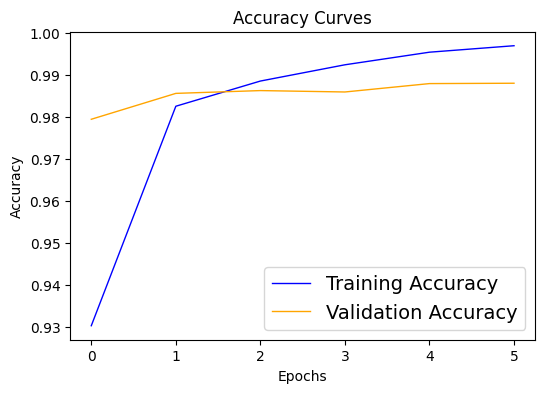

In [ ]:
# Plotting the loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'blue', linewidth=1.0)
plt.plot(history.history['val_loss'], 'orange', linewidth=1.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Plotting the accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'blue', linewidth=1.0)
plt.plot(history.history['val_accuracy'], 'orange', linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(accuracy)
print(loss)

0.9890999794006348
0.037343163043260574


This level of accuracy is more than what is needed for handwritten number recognition and one reason is the
non-critical context of the application. This applies to every example of Exercise 1: for instance, the recognition
of Medical records and prescriptions could affect the decisions of the doctors, hence the health of a patient
whereas in Finance it’s crucial to correctly recognize checks. Another reason is that in our case improving
further the model is not needed since we’re already close to the last state-of-the-art 2020 model scoring an
accuracy of 99.87 and an error of 0.13 on the MNIST dataset by mixing complex and different techniques as
explained in the paper “No Routing needed between capsules”.
Training such a model is more computationally intensive due to a high number of trainable parameters (1.5M)
compared to the 1.2M parameters of our model and to the 200K parameters of the answer 4 model. Training is
longer in the last model where the amount of time taken in each epoch is to 2 minutes whether the model of
the answer 4 is taking a marginal amount of time between 3 and 4 seconds per epoch. An increased amount
of data is required to train and test our model if we were to make it more complex by adding more neurons.
Lastly, the improved accuracy comes with drawbacks as further optimisation is needed which makes the whole
process time-consuming, which is not ideal. In conclusion, a further improvement to our model is making the
whole process not that cost-effective but rather computational and time-inefficient.


## Q7. Adding the Dropout
‘Dropout’ is a method used in deep network training to prevent overfitting of training
data and focus on aspects of the learning model that will generalise to new data

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.ops.gen_nn_ops import Softmax

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train / 255 #Data Normalisation
x_test = x_test / 255
y_train = keras.utils.to_categorical(y_train, 10) #One-hot encoding for each label
y_test =  keras.utils.to_categorical(y_test, 10)

print("x_train shape:", x_train.shape)  # Should be (60000, 28, 28)
print("y_train shape:", y_train.shape)  # Should be (60000,)
print("x_test shape:", x_test.shape)    # Should be (10000, 28, 28)
print("y_test shape:", y_test.shape)

#CNN
#2 Convolutional layer: 32 filters first layer, 64 filters 2nd layer.
#Sampling from source Image to 1st layer and 1sy layer to 2nd made with filters 3x3 pixels each.
#Rectified Activation Function for each Convolutional layer
#Downsamplind 2nd Conv. layer with Pooling. Size reduced to 1/2 for both dimension, hence 1/4 of pixel. This produce a feature map
#Resulting Feature map flattened to 1D
#Linking network to labels with 1-fully-connected-layer

#Add dropout layers after the
#max pooling stage (x = 0.25) and after the fully-connected (dense) layer (x = 0.5).
#Compile and train the resulting model as before.

model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')
history = model.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(accuracy)
print(loss)


x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 


Text(0.5, 1.0, 'Accuracy Curves')

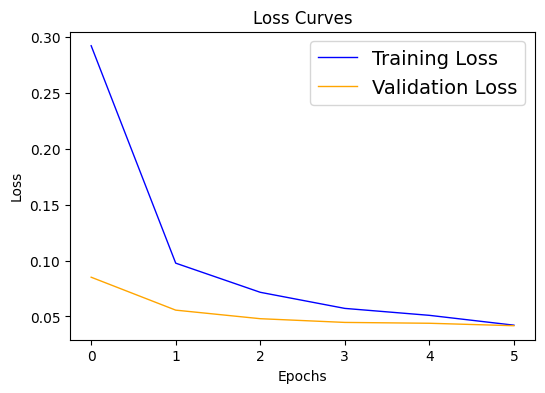

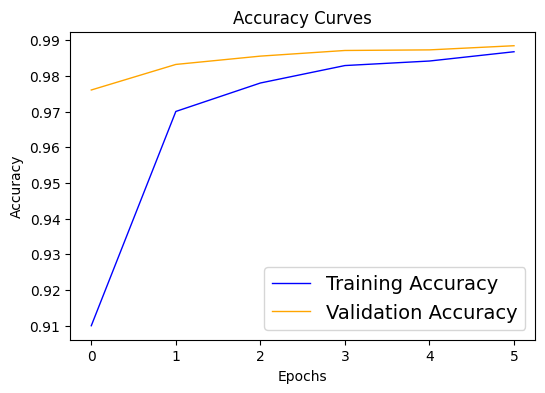

In [ ]:
# Plotting the loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'blue', linewidth=1.0)
plt.plot(history.history['val_loss'], 'orange', linewidth=1.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Plotting the accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'blue', linewidth=1.0)
plt.plot(history.history['val_accuracy'], 'orange', linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

**Comparison with teh previous model**


1.   training time
2.   training history
3.   model generalisation

The training time for the first epoch is slightly similar for both functions. From the second epoch, the
downward trend is the same with the last model amount of time distancing the previous by almost 6
seconds and later reducing the gap by ending up with the same amount (112s). The fourth epoch is
where the training time is the same for both the models (107s) while the fifth epoch training time
surges for both the models by 7 seconds. Finally, the training is completed at the sixth epoch where the
training time remains constant for the previous models and drops for the last model. The amount of
time taken for the last model in each epoch is the result of turning off neurons.
B. If we look at the general trend, we can see from the plot that in the last model the test accuracy
function exceeds the training accuracy function, meaning that the model was performing well with
unseen data. On the other hand, the previous model accuracy curves on training and validation
datasets overlapped at some point with the test accuracy exceeded by the training accuracy function.
When it comes to the Loss a similar but reversed situation can be observed in response to the increase
and improved learning along all the epochs. A close look at the epochs shows that the previous model
reached the greatest value in accuracy during the training but the lowest on the validation datasets
during the test. Both the model training accuracies have a short spike in the first two epochs and then
flatten whether the validation accuracy converged pretty soon.
C. The addition of the dropout in the layers prevented the network from overfitting which resulted in a
better generalisation of the model with a remarkable increase in test performance when compared to
the previous one.
Within the loss graph and the accuracy graph, the training curves are not intersecting each other as for
the validation curves and indeed they’re both converging in the last epoch reducing that loss overfitting
gap that characterises the corresponding curves of the previous model. If we look at the maximum
accuracy both in the previous and the last model, the increase is slightly noticeable (0.9885 - 0.9881 =
0.0004).

